# Data Description

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import re
import nltk
import numpy as np                                  
import pandas as pd
from bs4 import BeautifulSoup

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#There are 14640 observations 
df = pd.read_csv('Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.shape

(14640, 2)

In [3]:
df.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
counter = 0
for tweet in df['text']:
    soup = BeautifulSoup(tweet, "html.parser")
    df['text'][counter] = soup.get_text()
    counter += 1

In [5]:
#The contractions library was not installing properly. Hence, I created my own function to fix contractions
def decontract(words):
    words = re.sub(r"\'s", " is", words)
    words = re.sub(r"\'m", " am", words)
    words = re.sub(r"n\'t", " not", words)
    words = re.sub(r"\'re", " are", words)
    words = re.sub(r"\'t", " not", words)
    words = re.sub(r"\'d", " would", words)
    words = re.sub(r"\'ve", " have", words)
    words = re.sub(r"won\'t", "will not", words)
    words = re.sub(r"\'ll", " will", words)
    words = re.sub(r"can\'t", "can not", words)
    return words

In [6]:
stopwords = stopwords.words('english')

In [7]:
def preProcess(text):
    #Tokenize
    words = nltk.word_tokenize(text)
    result = []
    for word in words:
        #Remove contractions
        new = decontract(word)
        #Remove numbers
        new = re.sub(r'\d+', '', new)
        #Remove special characters and punctuation (non-ASCII characters)
        new = re.sub(r'[^\w\s]', '', new)
        #Conversion to lowercase
        new = new.lower()
        #Lemmatization
        lemmatizer = WordNetLemmatizer()
        new = lemmatizer.lemmatize(new, pos ='v')
            
        if new != '':
            result.append(new)   
        
    return result

In [ ]:
#The following code below can also be used for the same pre-processing purpose.
#However, the preProcess function above does the same thing with less lines of code, looping through the corpus once

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def makeLowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def removePunctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


def lemmatize(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = makeLowercase(words)
    words = removePunctuation(words)
    words = lemmatize(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

In [8]:
for i, row in df.iterrows():
    txt = df.at[i, 'text']
    words = preProcess(txt)
    words = ' '.join(words)
    df.at[i,'text'] = words
df.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus you have add commercials t...,positive
2,virginamerica i do not today must mean i need...,neutral
3,virginamerica it is really aggressive to blas...,negative
4,virginamerica and it is a really big bad thin...,negative


In [9]:
for i in range(10):
    print(df['text'][i])

virginamerica what dhepburn say
virginamerica plus you  have add commercials to the experience tacky
virginamerica i do  not today must mean i need to take another trip
virginamerica it  is really aggressive to blast obnoxious entertainment in your guests face they have little recourse
virginamerica and it  is a really big bad thing about it
virginamerica seriously would pay a flight for seat that do  not have this play it  is really the only bad thing about fly va
virginamerica yes nearly every time i fly vx this ear worm win t go away
virginamerica really miss a prime opportunity for men without hat parody there https tcomwpggrezp
virginamerica well i did notbut now i do d
virginamerica it be amaze and arrive an hour early you  are too good to me


In [10]:
# Vectorization (Convert text data to numbers).
count_vec1 = CountVectorizer(max_features=1000) 
countvec_features1 = count_vec1.fit_transform(df['text'])
countvec_features1 = countvec_features1.toarray()

count_vec2 = CountVectorizer(max_features=1000, ngram_range = (2,2)) 
countvec_features2 = count_vec2.fit_transform(df['text'])
countvec_features2 = countvec_features2.toarray()  

In [11]:
tfidf_vec1 = TfidfVectorizer(max_features=1000) 
tfidfvec_features1 = tfidf_vec1.fit_transform(df['text'])
tfidfvec_features1 = tfidfvec_features1.toarray()   

tfidf_vec2 = TfidfVectorizer(max_features=1000, ngram_range = (2,2)) 
tfidfvec_features2 = tfidf_vec2.fit_transform(df['text'])
tfidfvec_features2 = tfidfvec_features2.toarray()   

In [12]:
#Kept only a 1000 features to minimize processing time
print(countvec_features1.shape)
print(tfidfvec_features1.shape)

(14640, 1000)
(14640, 1000)


In [13]:
mapping = {"negative":1, "neutral":2, "positive":3}
df = df.replace({"airline_sentiment": mapping})

In [14]:
df

,text,airline_sentiment
0,virginamerica what dhepburn say,2
1,virginamerica plus you have add commercials t...,3
2,virginamerica i do not today must mean i need...,2
3,virginamerica it is really aggressive to blas...,1
4,virginamerica and it is a really big bad thin...,1
...,...,...
14635,americanair thank you we get on a different fl...,3
14636,americanair leave over minutes late flight no ...,1
14637,americanair please bring american airlines to ...,2
14638,americanair you have my money you change my fl...,1


In [15]:
#I create 4 train/test splits to observe how unigrams and bigrams affect the model performance
#I use the countvectorizer and tfidf vectorizer with unigrams and bigrams to train four models
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(countvec_features1, df['airline_sentiment'], test_size=0.3, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(countvec_features2, df['airline_sentiment'], test_size=0.3, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(tfidfvec_features1, df['airline_sentiment'], test_size=0.3, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(tfidfvec_features2, df['airline_sentiment'], test_size=0.3, random_state=0)

In [16]:
#Countvectorizer using unigrams model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest1 = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest1 = forest1.fit(X_train1, y_train1)
print(forest1)
print(np.mean(cross_val_score(forest1, countvec_features1, df['airline_sentiment'], cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7170765027322406


In [17]:
#Count vectorizer using bigrams model 
forest2 = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest2 = forest2.fit(X_train2, y_train2)
print(forest2)
print(np.mean(cross_val_score(forest2, countvec_features2, df['airline_sentiment'], cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.6691939890710382


In [18]:
#Tfidf vectorizer using unigrams model 
forest3 = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest3 = forest3.fit(X_train3, y_train3)
print(forest3)
print(np.mean(cross_val_score(forest3, tfidfvec_features1, df['airline_sentiment'], cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7183743169398907


In [19]:
#Tfidf vectorizer using bigrams model 
forest4 = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest4 = forest4.fit(X_train4, y_train4)
print(forest4)
print(np.mean(cross_val_score(forest4, tfidfvec_features2, df['airline_sentiment'], cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.6873633879781421


Insights: From the results of these four models, it appears that building classifiers using unigrams leads to better results. This is surprising since bigrams would theoretically capture more contextual information in the Tweets. In both the count vectorizer and tfidf vectorizer, unigrams yield higher accuracy. Thus, I make the decision to only do further analysis using unigrams from this point onwards. Additionally, it seems that the count vectorizer performs better than the tfidf vectorizer by a very slight amount, although not significantly better. Thus, I do further exploration on the the unigram models for both vectorizers

[[2563  180   45]
 [ 466  397   56]
 [ 252  117  316]]


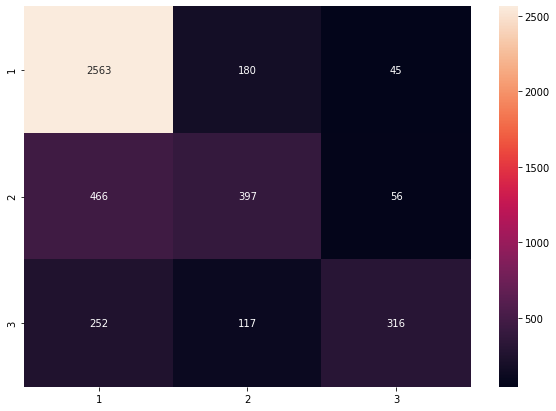

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Countvectorizer performance using unigrams
preds = forest1.predict(X_test1)
conf_mat = confusion_matrix(y_test1, preds)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

[[2610  133   45]
 [ 489  377   53]
 [ 287   97  301]]


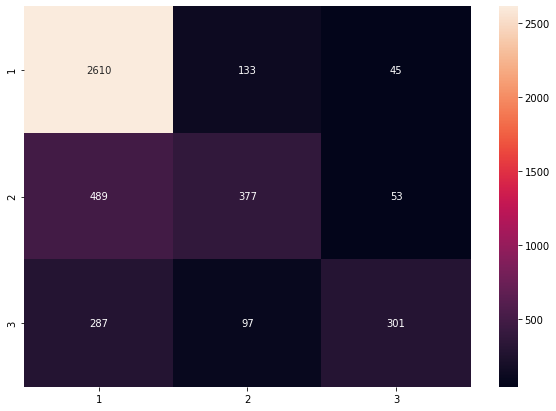

In [21]:
#Tf-idf vectorizer performance using unigrams
preds = forest3.predict(X_test3)
conf_mat = confusion_matrix(y_test3, preds)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [22]:
df.groupby(by=["airline_sentiment"]).count()

,text
airline_sentiment,
1,9178
2,3099
3,2363


In [28]:
print('CountVectorizer Model Negative Sentiment Accuracy: ' + str(2563/2788 * 100))
print('CountVectorizer Model Neutral Sentiment Accuracy: ' + str(397/919 * 100))
print('CountVectorizer Model Positive Sentiment Accuracy: ' + str(316/685 * 100))
print('')
print('TF-IDF Model Negative Sentiment Accuracy: ' + str(2610/2788 * 100))
print('TF-IDF Model Neutral Sentiment Accuracy: ' + str(377/919 * 100))
print('TF-IDF Model Positive Sentiment Accuracy: ' + str(301/685 * 100))

CountVectorizer Model Negative Sentiment Accuracy: 88.66571018651362
CountVectorizer Model Neutral Sentiment Accuracy: 47.87812840043525
CountVectorizer Model Positive Sentiment Accuracy: 51.67883211678832

TF-IDF Model Negative Sentiment Accuracy: 92.46771879483501
TF-IDF Model Neutral Sentiment Accuracy: 40.696409140369965
TF-IDF Model Positive Sentiment Accuracy: 46.277372262773724


# Summary

In this analysis, various pre-processing steps were done on a dataset of Twitter reviews on various airlines for the final purpose of sentiment analysis. Firstly, the data was tokenized, or broken up into individual words for pre-processing. These tweets contained special characters, punctuation, capital letters, and other non-required items that needed to be removed. This is done so that the data will be more processable by ML models. HTML tags were also removed since they do not contribute anything of value for sentiment analysis purposes. Special characters such as non-ASCII were removed as well to further denoise the dataset. Stop words can be removed to reduce dimensionality in the document-term matrix. These words also do not contribute much to the meaning of phrases and are thus not required for ML models. However, this was not done in this analysis to preserve contextual information. Lemmatization was done in order to convert inflections of a word into dictionary form. We use vectorizers in order to develop a bag of words, where we can see frequencies or relative frequencies of a word within the documents. The tf-idf vectorizer is used to evaluate the importance of a word in a single document without looking at other documents whereas the countvectorizer simply gives us counts of word occurrences. The documents can be read as unigrams, bigrams, trigrams, etc. Using higher n-grams increases dimensionality of the dataset by a lot, so to save computational expense I experiment with unigrams and bigrams only. Unigrams consider one word at a time whereas bigrams read in two words at a time. Although bigrams may help in understanding contextual information better, we see here that the unigram models yield better performance.

Overall, my models performed decently on this dataset, having accuracies around 70% for both CountVectorizer and Tf-Idf models. Negative sentiment was pervasive in the dataset, so the countvectorizer and tf-idf random forest models had accuracies of 88.67% and 92.47%, respectively within this subset. Both models were able to classify negative sentiment with high accuracy since a majority of the training data was filled with it. Neutral sentiment was predicted with accuracies of around mid 40% for both models. Despite normal amount of neutral sentiment in the dataset, the models did not do a particularly good job predicting these. Although positive sentiment had the least observations in the whole dataset, it was classified with around a 50% accuracy, slightly better than the accuracy of neutral sentiment. In the future, a larger dataset with more evenly distributed observations for each sentiment need to be used to improve performance.